# 挑戰：分析關於資料科學的文字

 在這個例子中，將進行一個簡單的練習，涵蓋傳統資料科學過程的所有步驟。您不需要編寫任何程式碼，只需點擊下面的單元格以執行它們並觀察結果。作為一個挑戰，您可以嘗試使用不同的資料來運行這段程式碼。

## 目標
現在讓我們通過進行一些文字探勘來發現更多相關概念。我們將以一篇關於NBA為例，從中提取關鍵詞，然後嘗試視覺化結果。

Data: data science Wikipedia

In [7]:
#先取得頁面資訊
url = 'https://en.wikipedia.org/wiki/Data_science'

### 第一步: 先取得資料

在每個資料科學過程的第一步是獲取數據。我們將使用requests庫來實現：

In [8]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.match(/(?:^|; )enwikimwclientprefs=

### 第二步:轉換資料

將數據轉換成適合處理的形式。在我們的例子中，我們已經下載了該頁面的HTML原始碼，現在需要將它轉換成純文本。

有很多方法可以實現這一點。我們將使用Python內置的最簡單的 [HTMLParser](https://docs.python.org/3/library/html.parser.html) 對象。我們需要子類化HTMLParser類並定義收集HTML標籤內所有文本的程式碼，但不包括 `<script>` 和 `<style>` 標籤。


In [9]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page across from the title. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Foundations Toggle Foundations subsection 1.1 Relationship to statistics 2 Etymology Toggle Etymology subsection 2.1 Early usage 2.2 Modern usage 3 Data Science and Data Analysis 4 See also 5 References Toggle the table of contents Toggle the table of contents Data science 46 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Bahasa Indonesia IsiZulu Italiano עברית ಕನ್ನಡ Қазақша Latvieš

### 步驟3：獲取洞察

最重要的步驟是將我們的數據轉換成一些形式，從中我們可以得出洞察。在我們的例子中，我們希望從文本中提取關鍵詞，並查看哪些關鍵詞更有意義。

我們將使用Python庫 [RAKE](https://github.com/aneesha/RAKE) 來進行關鍵詞提取。首先，讓我們安裝這個庫，以防它尚未安裝：

In [10]:
import sys
!{sys.executable} -m pip install nlp_rake


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


主要功能可通過`Rake`對象實現，我們可以使用一些參數對其進行自定義。在我們的例子中，我們將設置關鍵詞的最小長度為5個字符，文檔中關鍵詞的最小頻率為3，並且一個關鍵詞中的最大詞數為2。請隨意嘗試其他值並觀察結果。

In [11]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data scientist', 4.0),
 ('data visualization', 4.0),
 ('machine learning', 4.0),
 ('data mining', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('big data', 4.0),
 ('data scientists', 4.0),
 ('data science', 3.9242424242424243),
 ('information science', 3.9242424242424243),
 ('computer science', 3.9242424242424243),
 ('statistical learning', 3.9),
 ('^ davenport', 3.8),
 ('data analysis', 3.7333333333333334),
 ('science', 1.9242424242424243),
 ('analysis', 1.7333333333333334),
 ('insights', 1.6666666666666667),
 ('field', 1.4285714285714286),
 ('computational', 1.25),
 ('statistics', 1.2173913043478262),
 ('thomas', 1.2),
 ('mathematics', 1.0),
 ('education', 1.0),
 ('communications', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

我們獲得了一個關鍵詞列表，以及相關的重要程度。正如您所看到的，最相關的學科，如機器學習和大數據，在列表的前幾位。

### 步驟4：視覺化結果

以視覺形式呈現數據可以讓人們更好地解釋數據。因此，將數據可視化以得出一些洞察往往是有意義的。我們可以使用Python中的`matplotlib`庫來繪製關鍵詞及其相關程度的簡單分佈圖：

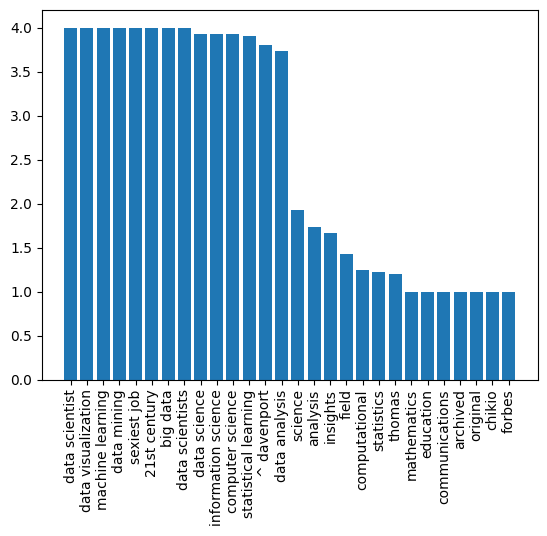

In [12]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

有一種更好的方式來視覺化詞頻 - 使用詞雲（Word Cloud）。我們需要安裝另一個庫來從我們的關鍵詞列表中繪製詞雲。

In [ ]:
!{sys.executable} -m pip install wordcloud

`WordCloud`對象負責接受原始文本或預先計算的帶有詞頻的詞語列表，然後返回一個圖像，可以使用`matplotlib`來顯示：

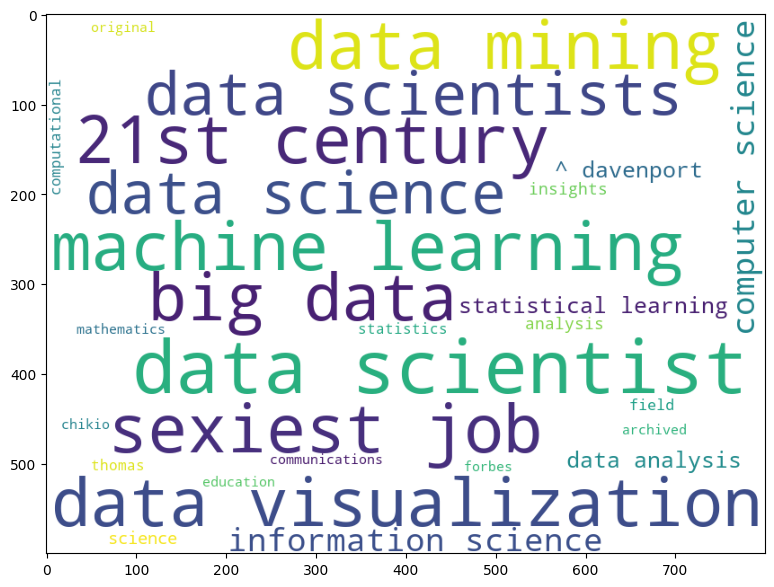

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

我們也可以將原始文本傳遞給`WordCloud` - 讓我們看看是否能夠得到類似的結果：

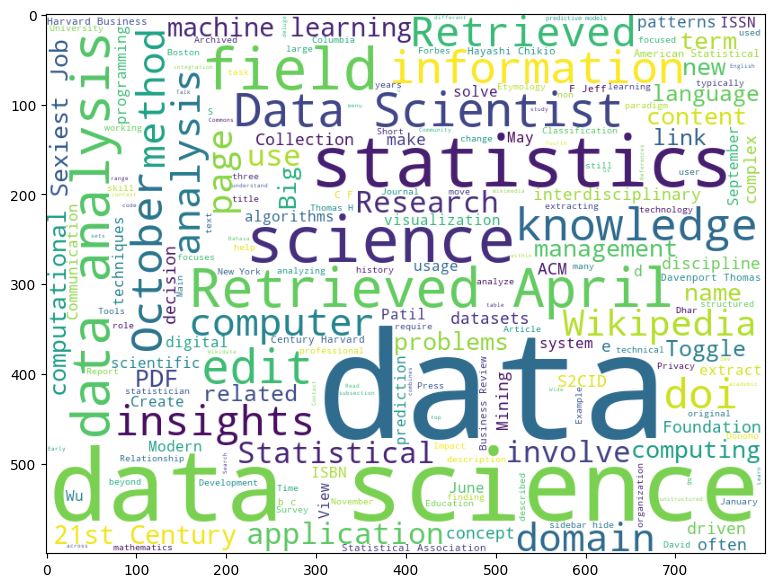

In [15]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [20]:
wc.generate(text).to_file('C:/Users/benso/OneDrive - 長庚大學/Desktop/study/Day1/df_wordcloud.png')